<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/PracticaRegresionLinealMultiple_RESUELTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández Delgadillo, Margarita Cristina
*   Matrícula: 255879

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# Tu código aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

print(df.head())
print('\nInformación estadística\n', df.describe())
print('\nInformación de los datos\n', df.info())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Información estadística
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 

## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.
 - La relación entre TV y Sales es claramente positiva, con los datos mostrando que siguen aproximadamente una línea ascendente (entre más compra de TVs, mayores ventas), lo que sugiere una fuerte correlación entre los dos.
 - Entre Radio y Sales también una relación positiva, aunque no tan pronunciada como con TV, en este caso se ve mas dispersión en los datos.
 - Entre Newspaper y Sales no se ve una relación definida, se aprecia mucha dispersión en los datos y no se ve un patrón definido (relación lineal).

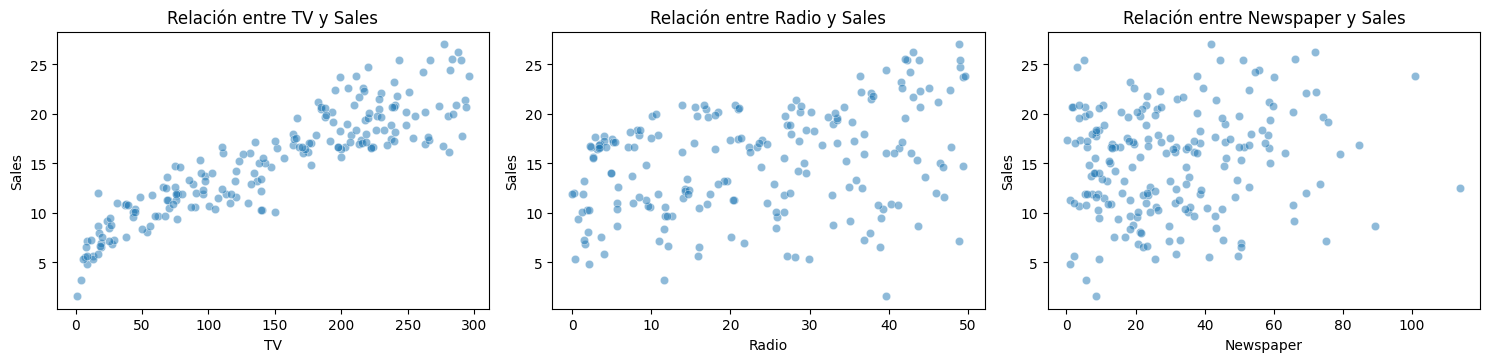

In [147]:
# Gráficos de dispersión
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Excluimos la columna 'Sales'
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[column], y=df['Sales'], alpha=0.5)
    plt.title(f"Relación entre {column} y Sales")
    plt.xlabel(column)
    plt.ylabel("Sales")

plt.tight_layout()
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?
 - La variables `TV` y `Radio` son las que se encuentran más correlacionadas, con `TV` teniendo la mayor correlación (0.90) y `Radio` teniendo una correlación moderada de 0.35. `Newspaper` es la variable que tiene la correlación más baja de 0.16 lo que indica una relación lineal débil.
 - Entre los predictores no hay una correlación alta, por ejemplo `TV` y `Radio` tienen una correlación de 0.05, `TV` y `Newspaper` una correlación de 0,06 y `Radio` y `Newspaper` una correlación de 0.35, la cual se puede considerar moderada.

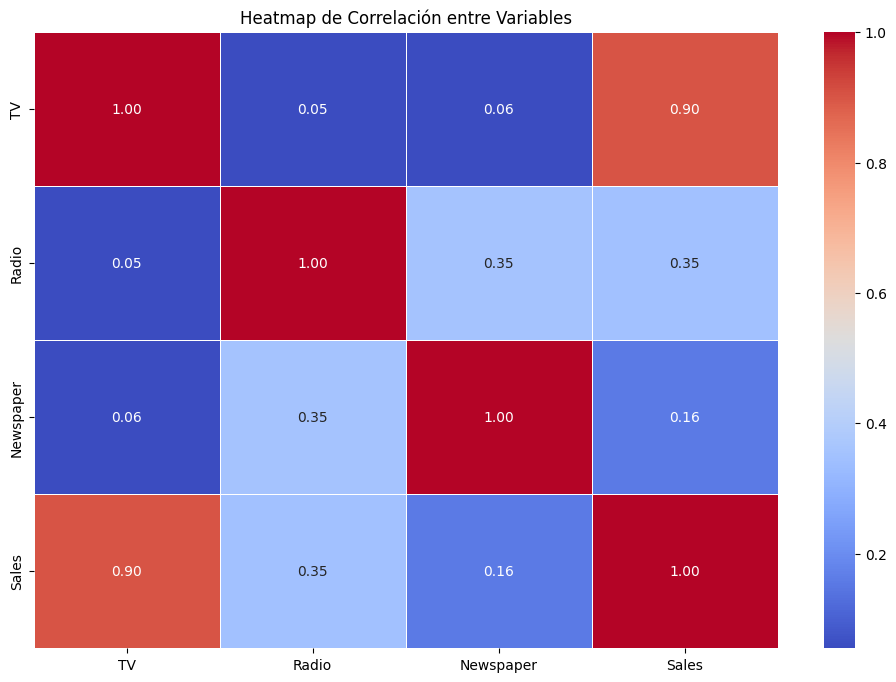

In [148]:
# Correlación y heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
 - No. En este caso, solo la constante es la que tiene un VIF mayor a 5 pero no es de preocupación ya que no es una de las variables principales (`TV`, `Radio`, `Newspaper`).
- ¿Qué implicaciones tiene esto para el modelo?
 - Esto implica que no hay problemas de multicolinealidad para el modelo.


### Análisis de Multicolinealidad ###
    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


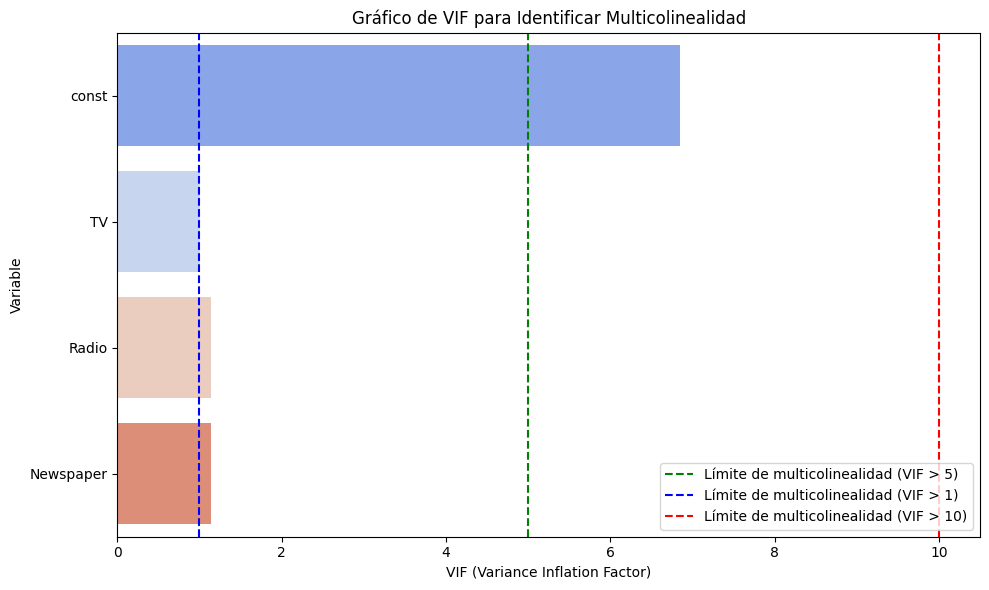

In [149]:
#Multicolinealidad
X = add_constant(df.drop(columns=['Sales']))
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n### Análisis de Multicolinealidad ###")
print(vif)

# Visualización de VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif, palette='coolwarm', hue='Variable') # Se agregó hue para remover el warning
plt.axvline(x=5, color='green', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.axvline(x=1, color='blue', linestyle='--', label='Límite de multicolinealidad (VIF > 1)')
plt.axvline(x=10, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 10)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes en términos de ventas?
 - **Intercepto:** Es la base de ventas. Por ejemplo, si todas las variables (`TV`, `Radio`, `Newspaper`) fueran 0, `Sales` será 4.625124078808653 (4.63) unidades.
 - **Coef. de TV:** Si `TV` aumenta una unidad, `Sales` aumentaría 0.05444578033757095 (0.54) unidades.
 - **Coef. de Radio:** Si `Radio` aumenta una unidad, `Sales` aumentaría 0.10700122823870292 (0.11) unidades.
 - **Coef. de Newspaper:** En esta caso el aumento es prácticamente 0. Si `Newspaper` aumenta una unidad, `Sales` aumentaría 0.00033565792233056224 (0.00034) unidades. Esto sugiere que no tiene una influencia tan grande en las ventas.

 Observando los resultados, `TV` y `Radio` son las variables que tienen un impacto sobre  `Sales`, con `Radio` aportando un poco más unidades que `TV` y `Newspaper` con muy poco impacto en las ventas.

In [150]:
#Entrenamiento del Modelo (Todas las Variables Independientes)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

print("Intercepto:", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coeficiente de {feature}: {coef}")

Intercepto: 4.625124078808653
Coeficiente de TV: 0.05444578033757095
Coeficiente de Radio: 0.10700122823870292
Coeficiente de Newspaper: 0.00033565792233056224


### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?
 - Se puede ver que los residuos tienen aproximadamente una distribución normal, con algunos residuos en la cola izquierda que puede indicar un ligero sesgo a la izquierda, pero no afecta de manera significativa la normalidad de su distribución.

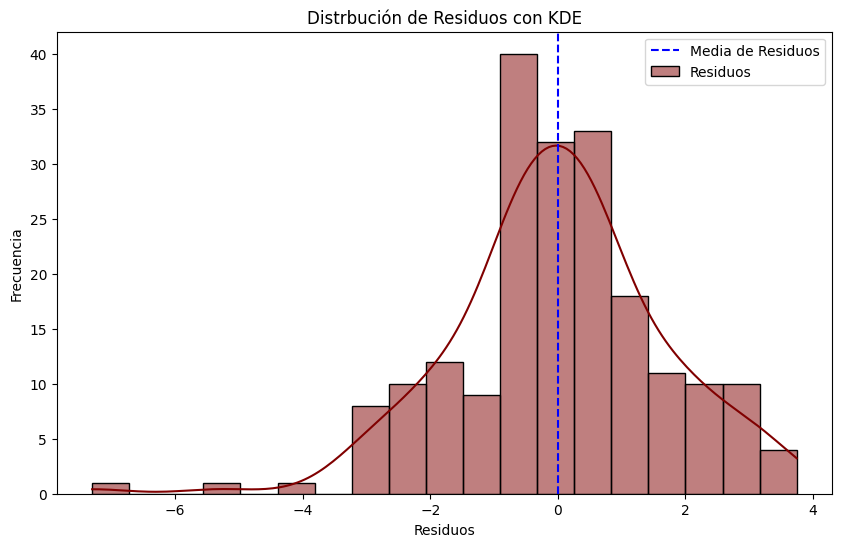

In [151]:
#Normalidad de los residuos
y_pred = model.predict(X)
residuos = y - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='maroon', label='Residuos')
plt.axvline(x=np.mean(residuos), color='blue', linestyle='--', label='Media de Residuos')
plt.ylabel('Frecuencia')
plt.xlabel('Residuos')
plt.title('Distrbución de Residuos con KDE')
plt.legend()
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?
 - No se observa un patrón, más bien los residuos se dispersan de manera aleatoria, lo que comprueba la homocedasticidad.

Text(0, 0.5, 'Residuos')

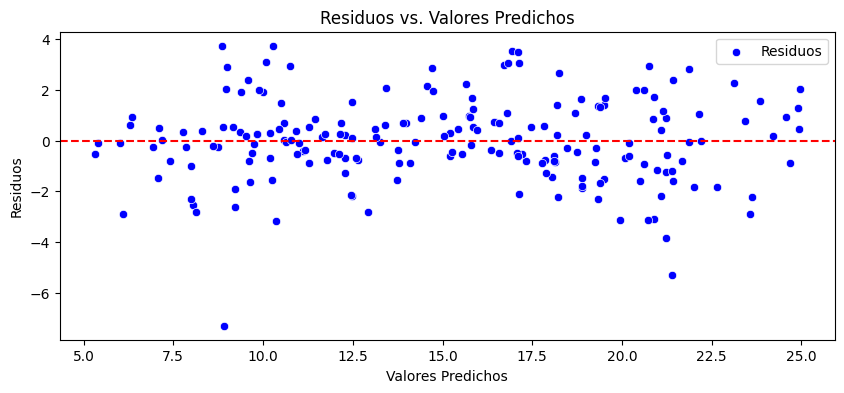

In [152]:
# Homocedasticidad
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_pred, y=residuos, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal
 - La mayoría de los residuos se alinean sobre la línea diagonal, lo que indica que siguen una distribución normal
b) Desviaciones sistemáticas indican asimetría o colas pesadas.
 - Se pueden ver que algunos residuos se encuentran alejados de la línea diagonal del lado izquierdo (valores negativos) lo que dice que hay una pequeña asimetría y valores atípicos de ese lado, pero no hay datos que afecten de una manera seria la supuesta normalidad de los datos.

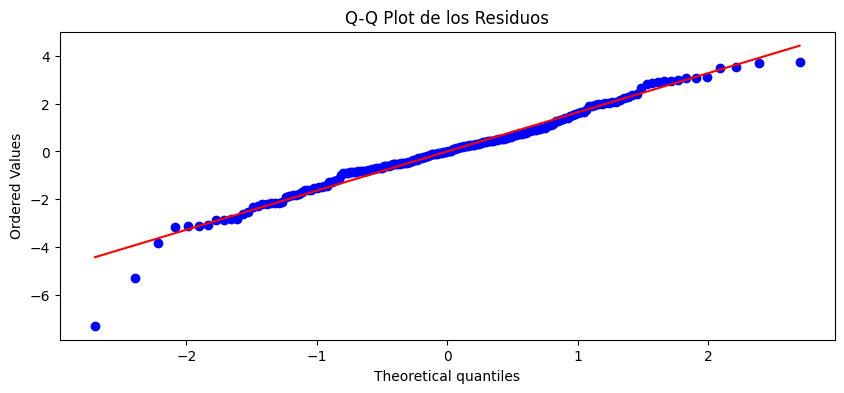

In [153]:
#Q-Q Plot
plt.figure(figsize=(10, 4))
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos')
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
 - El R² muestra que el modelo explica aprox. el 90% de la variabilidad de los datos, aunque haya 10% que no se capture, lo que indica un buen ajuste del modelo.
 - El MSE y RMSE son relativamente bajos en comparación con el rango total de los datos. El RMSE indica que los valores predichos se desvían aprox. 1.645 puntos de los valores reales.


In [154]:
#Evaluación del Modelo
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R²):", r2)

Error Cuadrático Medio (MSE): 2.706006147627315
Raíz del Error Cuadrático Medio (RMSE): 1.6449942697855562
Coeficiente de Determinación (R²): 0.9025912899684558


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas? ¿Qué información puedes obtener de esta gráfica?
 - Se puede ver en la gráfica que la mayoría de los valores siguen la "línea de prefección" lo que nos dice que los valores predichos se acercan mucho a los valores reales de `Sales`. Sin embargo, se puede ver que hay dispersión alrededor de la línea lo que indica que algunas predicciones están por arriba o por debajo de la "línea de perfección" (valores reales), es decir, hay existe un margen de error en la predicción, que tambien se puede ver en la tabla.

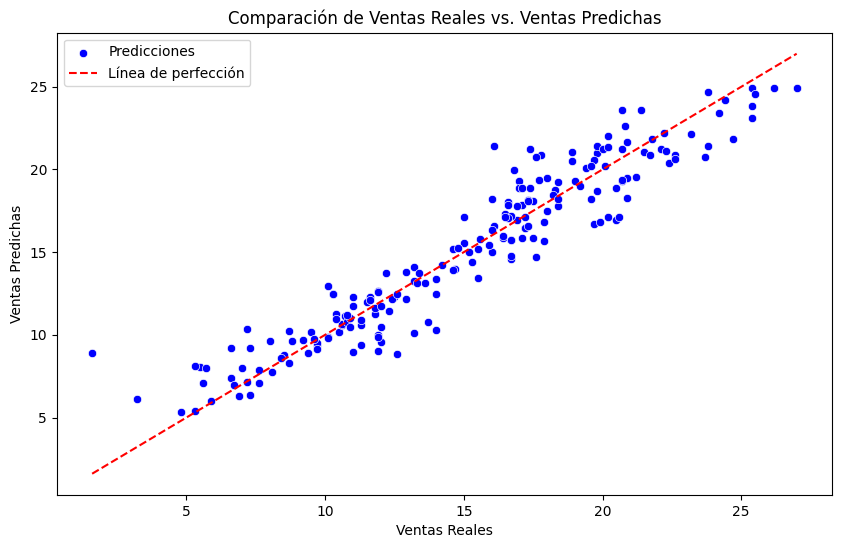


### Comparación de Ventas Reales vs. Ventas Predichas ###
   Ventas Reales  Ventas Predichas
0           22.1         21.220972
1           10.4         11.268248
2           12.0         10.496209
3           16.5         17.312447
4           17.9         15.644137
5            7.2         10.356337
6           11.8         11.273285
7           13.2         13.270625
8            4.8          5.318396
9           15.6         15.788710


In [155]:
#Visualización de las Predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicciones')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Línea de perfección')
plt.title('Comparación de Ventas Reales vs. Ventas Predichas')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.legend()
plt.show()

# Comparación de los primeros valores reales con las predicciones
comparison_df = pd.DataFrame({'Ventas Reales': y[:10], 'Ventas Predichas': y_pred[:10]})

print("\n### Comparación de Ventas Reales vs. Ventas Predichas ###")
print(comparison_df)

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?
  - La intersección (`const`), `TV` y `Radio` tienen p-values menores a 0.05.

 - ¿Cuál es la conclusión sobre esas variables?
  - El que estas variables, con excepción de `const`, tengan p-values menores a 0.05, indica que sí tienen un efecto significativo sobre la variable dependiente `Sales`.


In [156]:
#P-values
p_values = sm.add_constant(X)
modelo = sm.OLS(y, p_values).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           8.13e-99
Time:                        01:22:45   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.
- En el analisis realizado en el punto 3 se comprobó que las variables no tienen problemas de multicolinealidad.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

Ya que se encontró que `Newspaper` no tienen una gran correlación con `Sales`, se procederá a  la eliminación de esta variable y realizar nuevamente el punto 4.

## Parte 4: Construcción del Modelo (sin `Newspaper`), Evaluación

### 4.1 Entrenamiento del Modelo (sin `Newspaper`)
1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes en términos de ventas?
 - **Intercepto:** Es la base de ventas. Al eliminar la variable `Newspaper` este cambió a 4.630879464097768. Si todas las variables (`TV`, `Radio`) fueran 0, `Sales` será 4.630879464097768 (4.63) unidades.

 Los coeficientes de `TV` y `Radio` también tuvieron ligeros cambios.
 - **Coef. de TV:** De 0.05444578033757095 (0.544457) unidades cambió a 0.05444896073124318 (0.544489).
 - **Coef. de Radio:** De 0.10700122823870292 (0.10700) unidades cambió a 0.10717457133676095 (0.10717).

In [157]:
#Entrenamiento del Modelo (sin Newspaper)
df_copia = df.copy()
df_copia.drop(columns=['Newspaper'], inplace=True)
X_sin_newspaper = df_copia[['TV', 'Radio']]
y_sin_newspaper = df_copia['Sales']

modelo = LinearRegression()
modelo.fit(X_sin_newspaper, y_sin_newspaper)

print("Intercepto:", modelo.intercept_)
for feature, coef in zip(X_sin_newspaper.columns, modelo.coef_):
    print(f"Coeficiente de {feature}: {coef}")

Intercepto: 4.630879464097768
Coeficiente de TV: 0.05444896073124318
Coeficiente de Radio: 0.10717457133676095


### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?
 - Igual que cuando se incluía la variable `Newspaper`, se puede ver que los residuos tienen aproximadamente una distribución normal, con algunos residuos en la cola izquierda que puede indicar un ligero sesgo a la izquierda.

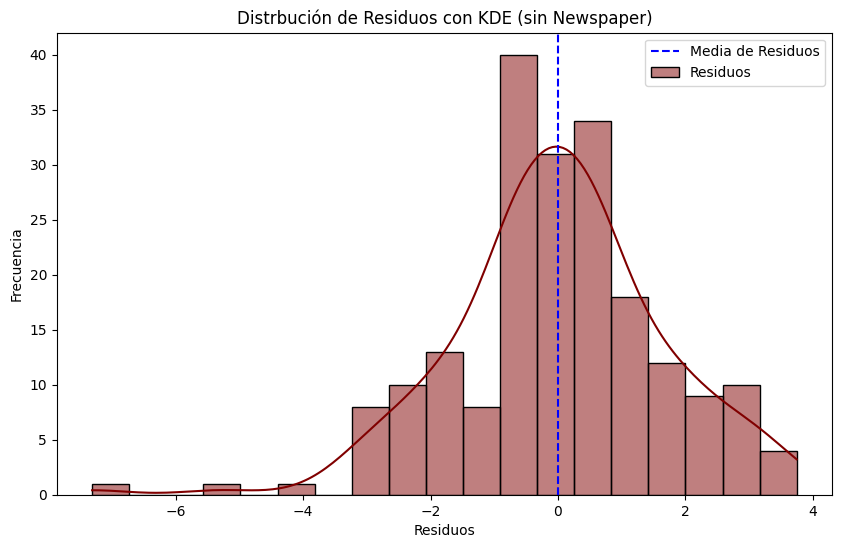

In [158]:
#Normalidad de los residuos
y_pred_sin_newspaper = modelo.predict(X_sin_newspaper)
residuos_sin_newspaper = y_sin_newspaper - y_pred_sin_newspaper

plt.figure(figsize=(10, 6))
sns.histplot(residuos_sin_newspaper, kde=True, color='maroon', label='Residuos')
plt.axvline(x=np.mean(residuos_sin_newspaper), color='blue', linestyle='--', label='Media de Residuos')
plt.ylabel('Frecuencia')
plt.xlabel('Residuos')
plt.title('Distrbución de Residuos con KDE (sin Newspaper)')
plt.legend()
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?
 - No se observa un patrón, más bien los residuos se dispersan de manera aleatoria, lo que comprueba la homocedasticidad.

Text(0, 0.5, 'Residuos')

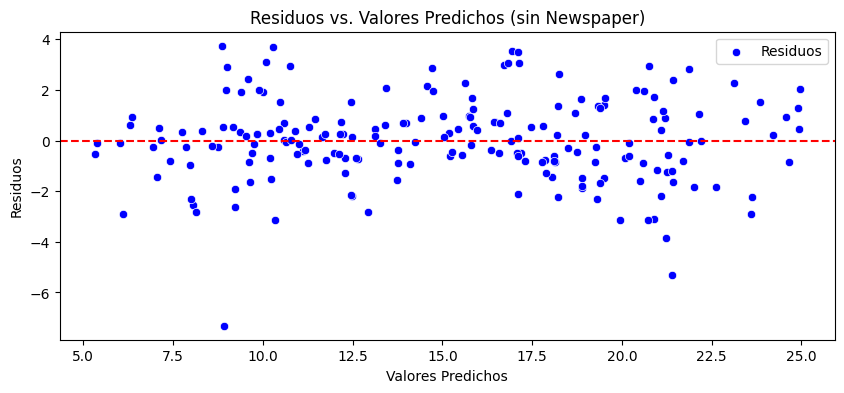

In [159]:
# Homocedasticidad
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_pred_sin_newspaper, y=residuos_sin_newspaper, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Predichos (sin Newspaper)')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal
 - La mayoría de los residuos se alinean sobre la línea diagonal, lo que indica que siguen una distribución normal

b) Desviaciones sistemáticas indican asimetría o colas pesadas.
 - Se pueden ver que algunos residuos se encuentran alejados de la línea diagonal del lado izquierdo (valores negativos) lo que dice que hay una pequeña asimetría y valores atípicos de ese lado, pero no hay datos que afecten de una manera seria la supuesta normalidad de los datos.

Sin la variable `Newspaper` no hubo cambios significativos.

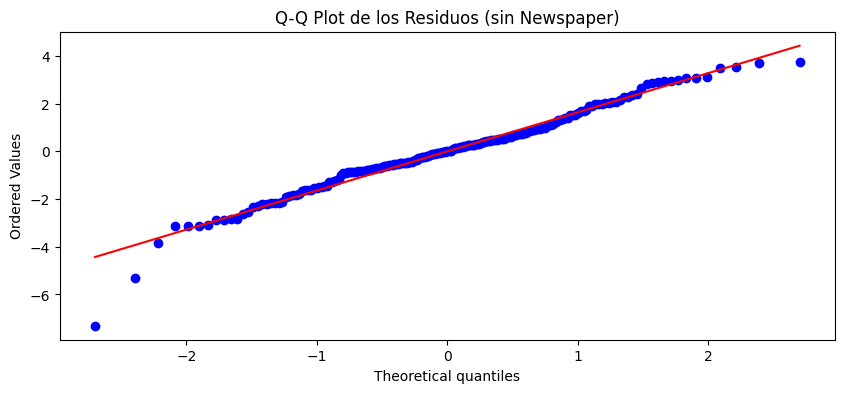

In [160]:
#Q-Q Plot
plt.figure(figsize=(10, 4))
stats.probplot(residuos_sin_newspaper, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos (sin Newspaper)')
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

No hubo cambios significativos en los resultados.
 - Igual que con la variable `Newspaper`, el R² muestra que el modelo explica aprox. el 90% de la variabilidad de los datos, aunque haya 10% que no se capture, lo que indica un buen ajuste del modelo.
 - Igual que con la variable `Newspaper`, el MSE y RMSE son relativamente bajos en comparación con el rango total de los datos. El RMSE indica que los valores predichos se desvían aprox. 1.645 puntos de los valores reales.


In [161]:
#Evaluación del Modelo
mse_sin_newspaper = mean_squared_error(y_sin_newspaper, y_pred_sin_newspaper)
rmse_sin_newspaper = np.sqrt(mse_sin_newspaper)
r2_sin_newspaper = r2_score(y_sin_newspaper, y_pred_sin_newspaper)

print("Error Cuadrático Medio (MSE):", mse_sin_newspaper)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_sin_newspaper)
print("Coeficiente de Determinación (R²):", r2_sin_newspaper)

Error Cuadrático Medio (MSE): 2.7060525778834883
Raíz del Error Cuadrático Medio (RMSE): 1.6450083823140502
Coeficiente de Determinación (R²): 0.9025896186081139


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas? ¿Qué información puedes obtener de esta gráfica?
 -  Igual que el modelo con `Newspaper`, se puede ver en la gráfica que la mayoría de los valores siguen la "línea de prefección" lo que nos dice que los valores predichos se acercan mucho a los valores reales de `Sales` y también que hay dispersión alrededor de la línea lo que indica que algunas predicciones están por arriba o por debajo de la "línea de perfección" (valores reales).

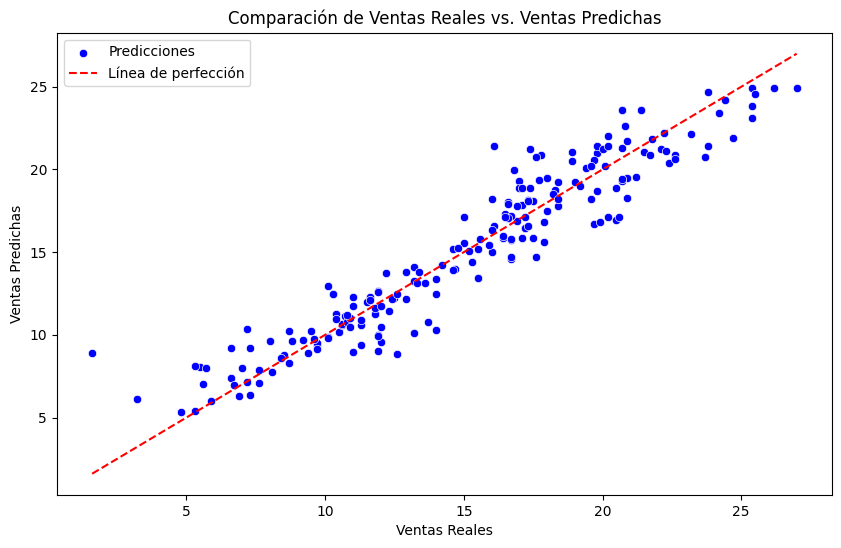


### Comparación de Ventas Reales vs. Ventas Predichas ###
   Ventas Reales  Ventas Predichas
0           22.1         21.210784
1           10.4         11.265819
2           12.0         10.486714
3           16.5         17.306207
4           17.9         15.632737
5            7.2         10.345422
6           11.8         11.277021
7           13.2         13.276266
8            4.8          5.324207
9           15.6         15.788436


In [162]:
#Visualización de las Predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_sin_newspaper, y=y_pred_sin_newspaper, color='blue', label='Predicciones')
plt.plot([min(y_sin_newspaper), max(y_sin_newspaper)], [min(y_sin_newspaper), max(y_sin_newspaper)], color='red', linestyle='--', label='Línea de perfección')
plt.title('Comparación de Ventas Reales vs. Ventas Predichas')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.legend()
plt.show()

# Comparación de los primeros valores reales con las predicciones
comparacion_df = pd.DataFrame({'Ventas Reales': y_sin_newspaper[:10], 'Ventas Predichas': y_pred_sin_newspaper[:10]})

print("\n### Comparación de Ventas Reales vs. Ventas Predichas ###")
print(comparacion_df)

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?
  - La intersección (`const`), `TV` y `Radio` tienen p-values menores a 0.05.

 - ¿Cuál es la conclusión sobre esas variables?
  - El que estas variables, con excepción de `const`, tengan p-values menores a 0.05, indica que sí tienen un efecto significativo sobre la variable dependiente `Sales`.


In [164]:
#P-values
p_values = sm.add_constant(X_sin_newspaper)
modelo = sm.OLS(y_sin_newspaper, p_values).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          2.39e-100
Time:                        01:40:48   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
- Ya que no se encontraron problemas de multicolinealidad, sólo se realizaron 2 modelos en total, 1 con las 3 variables `TV`, `Radio` y `Newspaper` y otro eliminando la variable sin relación lineal `Newspaper`.
Los dos modelos que se crearon son muy similares, solo con diferencias muy pequeñas en los cálculos numéricos. Se puede decir que el segundo modelo es mejor ya que sin menos variables (no se utiliza la variable `Newspaper`)
¿Cuál fue el atributo que mas influencia tiene en las ventas?
- Aunque `Radio` tiene mayor coeficiente, tomando en cuenta que es publicidad y `TV` tiene mas correlación con `Sales`, al final `TV` es la que tienen mayor influencia en la ventas.